In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd        
from math import sqrt
import networkx as nx
import adjmatrix
import numpy as np 

In [2]:
concr_data = pd.read_csv('C:/Users/Eva Martin/OneDrive - UAM/Documentos/MorenoHerreroLab/Estancia/CONCR_test_FMH/output_4/all_disordered_segment_statistics.csv')
concr_data.head(20)

,image,threshold,grain_number,index,branch_distance,branch_type,connected_segments,mean_pixel_value,stdev_pixel_value,min_value,median_value,middle_value,basename
0,1,above,0,0,14.787240,1,"[1, 2]",0.600997,0.059646,0.479759,0.628742,0.643032,..\CONCR_test_FMH\stp_files
1,1,above,0,1,33.174373,2,"[0, 2, 5, 6]",0.531793,0.175295,0.209047,0.507949,0.244502,..\CONCR_test_FMH\stp_files
2,1,above,0,2,8.453958,2,"[0, 1, 3, 4]",0.437767,0.097775,0.323294,0.433644,0.332054,..\CONCR_test_FMH\stp_files
3,1,above,0,3,11.146692,1,"[2, 4]",0.570466,0.037101,0.491929,0.571744,0.537611,..\CONCR_test_FMH\stp_files
4,1,above,0,4,10.979140,1,"[2, 3]",0.378557,0.081793,0.268611,0.362868,0.291852,..\CONCR_test_FMH\stp_files
5,1,above,0,5,26.101483,1,"[1, 6]",0.513864,0.130388,0.309775,0.537786,0.340046,..\CONCR_test_FMH\stp_files
6,1,above,0,6,6.096328,1,"[1, 5]",0.645513,0.049060,0.551328,0.656729,0.673468,..\CONCR_test_FMH\stp_files
7,10,above,0,0,30.747341,2,"[1, 2, 3, 4]",0.655874,0.226344,0.186009,0.755012,0.847642,..\CONCR_test_FMH\stp_files
8,10,above,0,1,15.624998,1,"[0, 2]",0.724401,0.066720,0.620207,0.757995,0.711194,..\CONCR_test_FMH\stp_files
9,10,above,0,2,14.885389,2,"[0, 1, 4, 5]",0.645059,0.056326,0.566586,0.638917,0.583452,..\CONCR_test_FMH\stp_files


In [3]:
# Agrupa por 'image' y 'grain_number'
grouped = concr_data.groupby(['image', 'grain_number'])


# Inicializar listas para almacenar los subconjuntos
all_branch_types = []
branch_distances= []
all_indexes = []
all_connected_segments = []
images = []
# Itera por cada grupo
for (image_val, grain_val), group_df in grouped:
    print(f"Grupo: Image = {image_val}, Grain = {grain_val}")
    #print(group_df["index"])  # Aquí tienes cada subconjunto
    branch_types = group_df['branch_type'].tolist()
    indexes = group_df['index'].tolist()
    connected_segments = group_df['connected_segments'].tolist()
    branch_distance = group_df['branch_distance'].tolist()
    image = group_df['image'].tolist()

    all_branch_types.append(branch_types)
    all_indexes.append(indexes)
    all_connected_segments.append(connected_segments)
    branch_distances.append(branch_distance)
    images.append(image)
    # Aquí podrías hacer lo que necesites con cada grupo, por ejemplo:
    # group_df.to_csv(f"image_{image_val}_grain_{grain_val}.csv", index=False)
print(len(all_indexes))

Grupo: Image = 1, Grain = 0
Grupo: Image = 2, Grain = 0
Grupo: Image = 3, Grain = 0
Grupo: Image = 4, Grain = 0
Grupo: Image = 5, Grain = 0
Grupo: Image = 6, Grain = 0
Grupo: Image = 7, Grain = 0
Grupo: Image = 8, Grain = 0
Grupo: Image = 9, Grain = 0
Grupo: Image = 10, Grain = 0
Grupo: Image = 11, Grain = 0
Grupo: Image = 11, Grain = 1
Grupo: Image = 11, Grain = 2
Grupo: Image = 11, Grain = 3
Grupo: Image = 11, Grain = 4
Grupo: Image = 12, Grain = 0
Grupo: Image = 13, Grain = 0
Grupo: Image = 14, Grain = 0
Grupo: Image = 15, Grain = 0
Grupo: Image = 16, Grain = 0
Grupo: Image = 17, Grain = 0
Grupo: Image = 18, Grain = 0
Grupo: Image = 19, Grain = 0
Grupo: Image = 20, Grain = 0
Grupo: Image = 21, Grain = 0
Grupo: Image = 22, Grain = 0
Grupo: Image = 23, Grain = 0
Grupo: Image = 24, Grain = 0
Grupo: Image = 25, Grain = 0
Grupo: Image = 26, Grain = 0
Grupo: Image = 27, Grain = 0
Grupo: Image = 27, Grain = 1
Grupo: Image = 27, Grain = 2
Grupo: Image = 28, Grain = 0
Grupo: Image = 28, Grai

Loop: We compate all adjancecy matrices in our list. first one with the n-1. then second one with n-2. so on and so forth. 
In each comparison iteration: 
    If they are isomorphic: compare and save adjancency matrix in dictionary with key the group number. 
    
    First the dict will be empty. 
    
    Then we will have to compare. 
    
    FIRST see if our matrix/es are already in one groupe. 
        If not,  will need to compare our couple (one of them) to each group existing in the dict. 
        If is isomorphic to one then we put our couple in that group. 
        if not create a new one. We increase one counter. move to next
    Else: they are not isomorphic and move to next.
If counter == 0 and matrix is not already in one gropup == create a new group for only this one. 

In [4]:
def str2list(string):
    array = list(np.fromstring(string[1:-1], dtype=int, sep=','))
    return array 


In [6]:
#create empty dict 
classification = {}
indexes_grouped = {}
distances_grouped={}

# Inizialize the dict, do firt iteration 
indexes = all_indexes[0]
connected_branches_0 = all_connected_segments[0]
weigths_0 = branch_distances[0]

array_connected_branches0 = [str2list(connected_branches_0[index]) for index in indexes] #list of np arrays 
eje_a_nodos0 = adjmatrix.procesar_segmentos(array_connected_branches0, all_branch_types[0])
      
j = len(eje_a_nodos0)
list_nx0=[]
for h in range(j):
    n1,n2 = eje_a_nodos0[h]
    list_nx0.append((n1,n2,weigths_0[h]))


Gw0 = nx.Graph()
Gw0.add_weighted_edges_from(list_nx0)
M0= nx.adjacency_matrix(Gw0,nodelist=list(range(1,len(Gw0)+1))).toarray()
classification["Group_0"] = [M0]
indexes_grouped["Group_0_index"] =[1]
distances_grouped["Group_0_index"] =[0]


for m in range(1, len(all_indexes)):
    indexes2 = all_indexes[m]
    branch_type2 = all_branch_types[m]
    connected_branches2 = all_connected_segments[m]
    weigths2 = branch_distances[m]

    array_connected_branches2 = [str2list(connected_branches2[index]) for index in indexes2] #list of np arrays 
    eje_a_nodos2 = adjmatrix.procesar_segmentos(array_connected_branches2, branch_type2)
    
    # insert here code for comparing         
    j = len(eje_a_nodos2)
    list_nx2=[]
    for h in range(j):
        n1,n2 = eje_a_nodos2[h]
        list_nx2.append((n1,n2,weigths2[h]))

    Gw2 = nx.Graph()
    Gw2.add_weighted_edges_from(list_nx2)

    tf = nx.is_isomorphic(Gw0, Gw2, node_match=None, edge_match=None)
    # here code to save in dict. 
    if tf == True:
        distance,M2 = adjmatrix.find_adj_matrix(M0,Gw2)
        classification["Group_0"].append(M2)
        indexes_grouped["Group_0_index"].append(m+1)
        distances_grouped[f"Group_0_index"].append(distance)

possible mistake in graph


In [7]:
print(distances_grouped["Group_0_index"])

[0, 103.26181832954117, 97.59874299916825, 71.12150185059075, 100.96686113319534, 107.02926353203293, 124.07598414774574, 83.67229208366533, 113.83589614654761, 102.06020971395364, 112.55353455994714, 121.59145723870608, 90.73405905320784, 83.06036434576556, 70.05869753746194, 93.02228703519464, 129.40392268348026, 82.30884820887785, 77.45478363998679, 53.739678005366365, 79.35041376786792, 123.2094787616698]


In [8]:

group_counter = 0
for n in range(1,len(all_indexes)):
    indexes = all_indexes[n]
    branch_type = all_branch_types[n]
    connected_branches = all_connected_segments[n]
    weigths = branch_distances[n]

    array_connected_branches = [str2list(connected_branches[index]) for index in indexes] #list of np arrays 
    eje_a_nodos = adjmatrix.procesar_segmentos(array_connected_branches, branch_type)

    i = len(eje_a_nodos)
    list_nx=[]
    for h in range(i):
        n1,n2 = eje_a_nodos[h]
        list_nx.append((n1,n2,weigths[h]))
    Gw = nx.Graph()
    Gw.add_weighted_edges_from(list_nx)


    #chech if belong to one group (just isomorph)
    one_true=False
    for k, v in indexes_grouped.items():
        ind = n+1
        if ind in v:
            one_true =True
            
    if one_true == True:
        pass
    else: 
        group_counter = group_counter + 1
        indexes_grouped[f"Group_{group_counter}_index"] =[n]
        M1= nx.adjacency_matrix(Gw,nodelist=list(range(1,len(Gw)+1))).toarray()
        classification[f"Group_{group_counter}"] = [M1]
        indexes_grouped[f"Group_{group_counter}_index"] =[n+1]
        distances_grouped[f"Group_{group_counter}_index"] =[0]


        for m in range(n+1, len(all_indexes)):
            indexes2 = all_indexes[m]
            branch_type2 = all_branch_types[m]
            connected_branches2 = all_connected_segments[m]
            weigths2 = branch_distances[m]

            array_connected_branches2 = [str2list(connected_branches2[index]) for index in indexes2] #list of np arrays 
            eje_a_nodos2 = adjmatrix.procesar_segmentos(array_connected_branches2, branch_type2)
                        
            j = len(eje_a_nodos2)
            list_nx2=[]
            for h in range(j):
                n1,n2 = eje_a_nodos2[h]
                list_nx2.append((n1,n2,weigths2[h]))

            Gw2 = nx.Graph()
            Gw2.add_weighted_edges_from(list_nx2)

            tf = nx.is_isomorphic(Gw, Gw2, node_match=None, edge_match=None)
            if tf == True:
                distance,M2 = adjmatrix.find_adj_matrix(M1,Gw2)
                classification[f"Group_{group_counter}"].append(M2)
                indexes_grouped[f"Group_{group_counter}_index"].append(m+1)
                distances_grouped[f"Group_{group_counter}_index"].append(distance)




possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


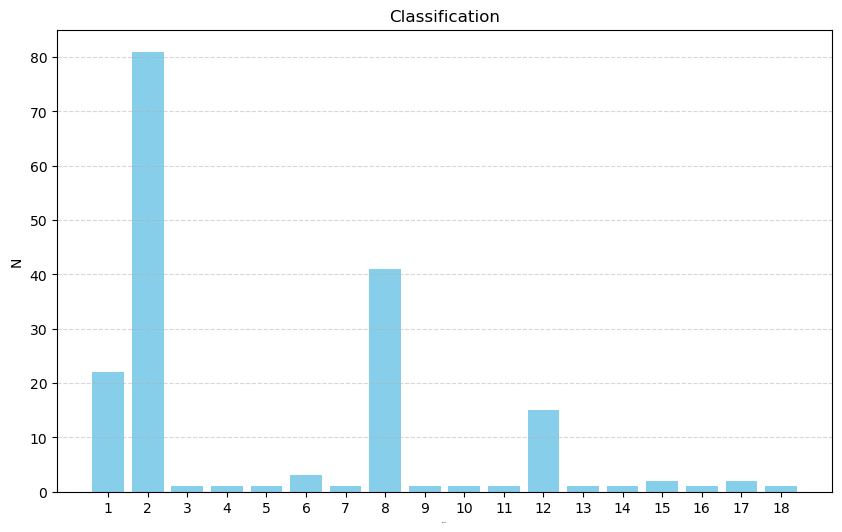

In [91]:
total = 0
values = []
categorias=[]
counter = 0
for k,v in classification.items():
    counter = counter+1
    values.append(len(v))
    categorias.append(str(counter))
print(categorias)
#print(total)
#print(classification.keys())
plt.figure(figsize=(10, 6)) 
plt.bar(categorias, values, color='skyblue')
plt.title("Classification")
plt.xlabel("Classes", fontsize = 1)
plt.ylabel("N")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


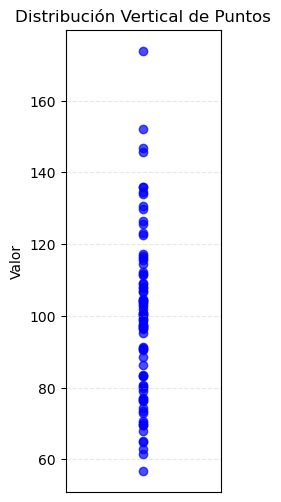

In [27]:
valores = distances_grouped["Group_1_index"]
valores = [v for v in valores if v != 0]
x = [0] * len(valores)

# Graficamos
plt.figure(figsize=(2, 6))  # ancho x alto
plt.scatter(x, valores, color='blue', alpha=0.7)

# Mejoras visuales
plt.xticks([])  # Quita eje X
plt.ylabel('Valor')
plt.title('Distribución Vertical de Puntos')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.show()

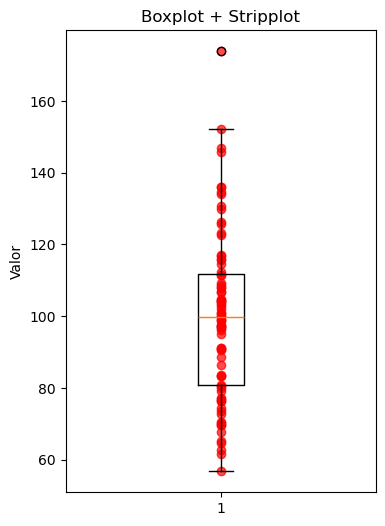

In [28]:
plt.figure(figsize=(4, 6))
plt.boxplot(valores, vert=True, positions=[1])
plt.scatter([1]*len(valores), valores, color='red', alpha=0.7)
plt.xlim(0.5, 1.5)
plt.title("Boxplot + Stripplot")
plt.ylabel("Valor")
plt.show()

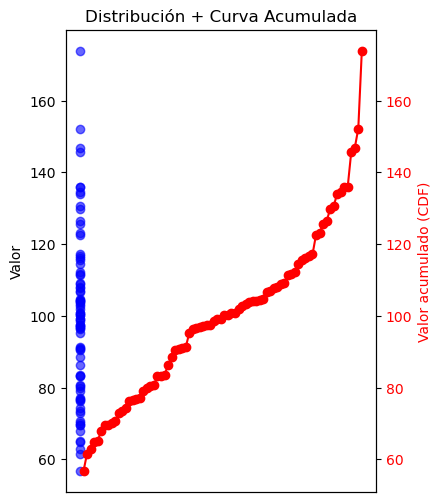

In [29]:
# Ordenamos los valores
valores_ordenados = np.sort(valores)

# Calculamos la fracción acumulada
cdf = np.arange(1, len(valores_ordenados) + 1) / len(valores_ordenados)

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(4, 6))

# Scatter vertical (strip plot)
ax1.scatter([0]*len(valores), valores, color='blue', alpha=0.6, label='Puntos')
ax1.set_ylabel('Valor')
ax1.set_xticks([])
ax1.set_title('Distribución + Curva Acumulada')

# Eje secundario para la curva acumulativa
ax2 = ax1.twinx()
ax2.plot([0.1]*len(cdf), valores_ordenados, alpha=0)  # para mantener altura
ax2.plot(cdf, valores_ordenados, color='red', linestyle='-', marker='o', label='Acumulado')
ax2.set_ylabel('Valor acumulado (CDF)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Mostrar
plt.show()

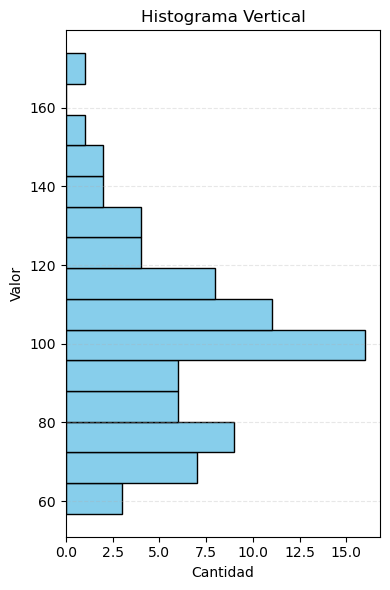

In [31]:
plt.figure(figsize=(4, 6))
plt.hist(valores, bins=15, orientation='horizontal', color='skyblue', edgecolor='black')

# Ajustes visuales
plt.xlabel('Cantidad')
plt.ylabel('Valor')
plt.title('Histograma Vertical')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [75]:
# Supón que matrices es tu lista de arrays
matrices = classification["Group_1"] # lista de np.arrays de forma fija, como (3, 3)

# Número de matrices
n = len(matrices)

# Matriz de distancias
distancias = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distancias[i, j] = np.sum(np.abs(matrices[i] - matrices[j]))
print(distancias)
print(n)

[[  0.         109.31749151  90.45645045 ...  62.77760068 173.85191802
   91.06916228]
 [109.31749151   0.          69.91989324 ... 117.12999052 142.93702521
   75.50165889]
 [ 90.45645045  69.91989324   0.         ...  75.50165889 130.82567884
   19.58874215]
 ...
 [ 62.77760068 117.12999052  75.50165889 ...   0.         180.99421057
   64.39562221]
 [173.85191802 142.93702521 130.82567884 ... 180.99421057   0.
  135.06703158]
 [ 91.06916228  75.50165889  19.58874215 ...  64.39562221 135.06703158
    0.        ]]
81


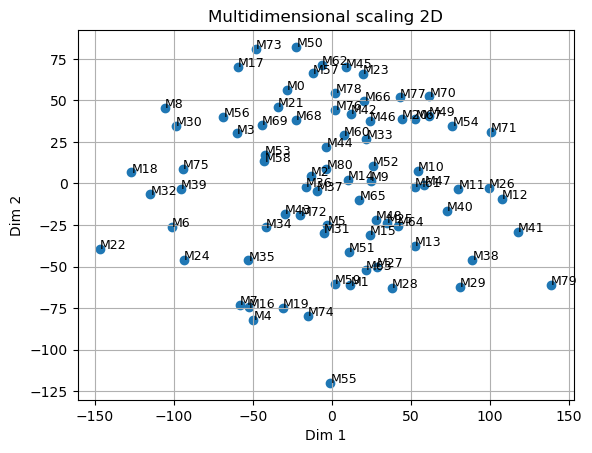

In [92]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
coords = mds.fit_transform(distancias)

plt.scatter(coords[:, 0], coords[:, 1])
for i in range(n):
    plt.text(coords[i, 0], coords[i, 1], f"M{i}", fontsize=9)
plt.title("Multidimensional scaling 2D")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

c:\Users\Eva Martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


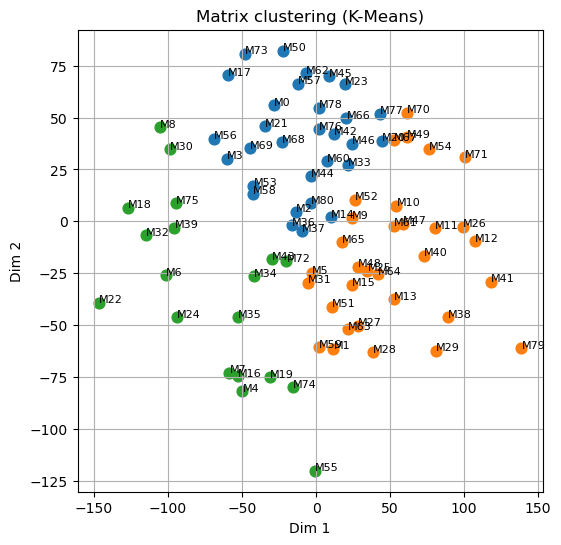

[0 1 0 0 2 1 2 2 2 1 1 1 1 1 0 1 2 0 2 2 0 0 2 0 2 1 1 1 1 1 2 1 2 0 2 2 0
 0 1 2 1 1 0 2 0 0 0 1 1 1 0 1 1 0 1 2 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 2 0
 2 2 0 0 0 1 0]
{(0, 2): 31.70153358714644, (1, 3): 17.48935762219795, (2, 3): 11.3991095668358, (2, 5): 18.40339949119554, (3, 4): 10.271704973278894}


{(0, 2): Text(0.5155401117144085, 0.010361088425324919, '31.70'),
 (1, 3): Text(-0.2976566772447412, 0.34145861844229636, '17.49'),
 (2, 3): Text(-0.11399405282436956, -0.025192213162391654, '11.40'),
 (2, 5): Text(0.07462055710891687, -0.40224724265798445, '18.40'),
 (3, 4): Text(-0.4064980444029537, 0.025235322627971492, '10.27')}

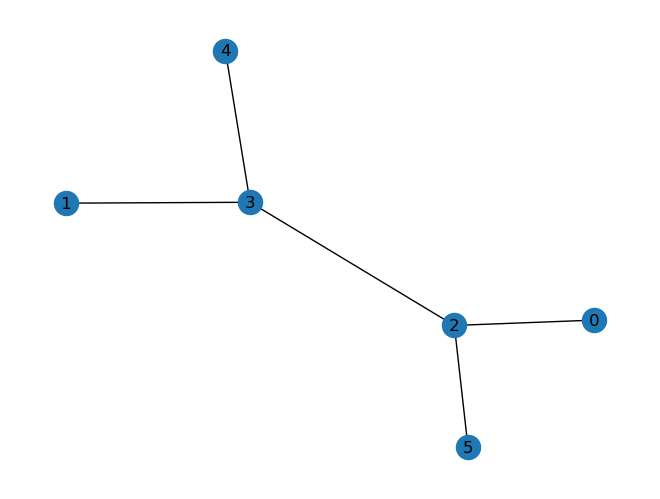

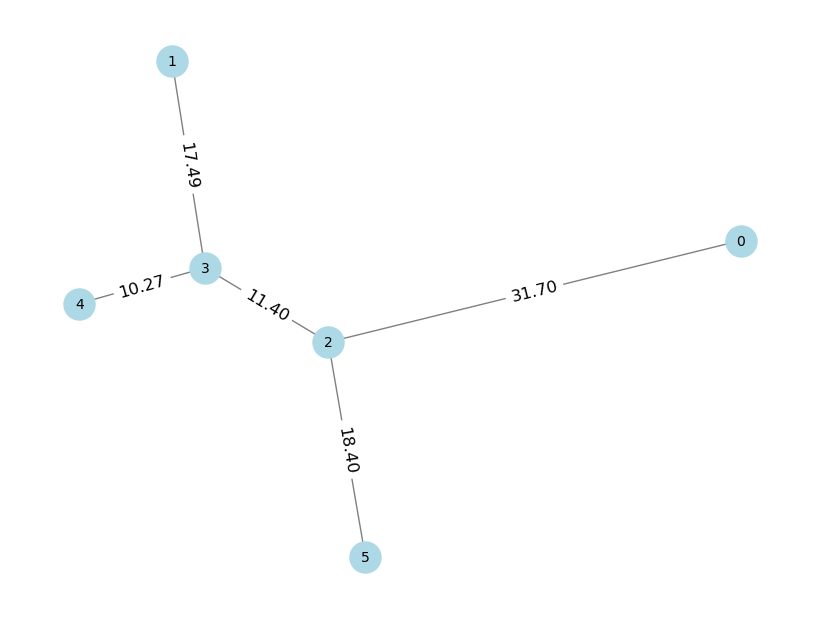

In [112]:
from sklearn.cluster import KMeans


# Número de grupos que quieres (puedes ajustarlo o usar métodos para estimarlo)
k = 3

# Agrupar
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(coords)

# Visualizar con los grupos
plt.figure(figsize=(6, 6))
for i in range(len(coords)):
    plt.scatter(coords[i, 0], coords[i, 1], c=f"C{labels[i]}", label=f"Grupo {labels[i]}" if i == 0 else "", s=60)
    plt.text(coords[i, 0], coords[i, 1], f"M{i}", fontsize=8)

plt.title("Matrix clustering (K-Means)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

print(labels)

from collections import defaultdict

# Agrupar por cluster
grupos = defaultdict(list)

for matriz, label in zip(matrices, labels):
    grupos[label].append(matriz)

matrices_promedio = {}

for label, mats in grupos.items():
    matrices_promedio[label] = np.mean(mats, axis=0)


DG = nx.from_numpy_array(matrices_promedio[0], create_using=nx.Graph) #nodelist=[1,2,3,4,5,6] ??


DG.edges(data=True)
nx.draw(DG,with_labels=True) 
edge_weights = nx.get_edge_attributes(DG, 'weight')
print(edge_weights)

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(DG, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {dupl: f"{w:.2f}" for dupl, w in edge_weights.items()}
#edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
nx.draw_networkx_edge_labels(Gw2, pos, edge_labels=edge_labels, font_size=12)

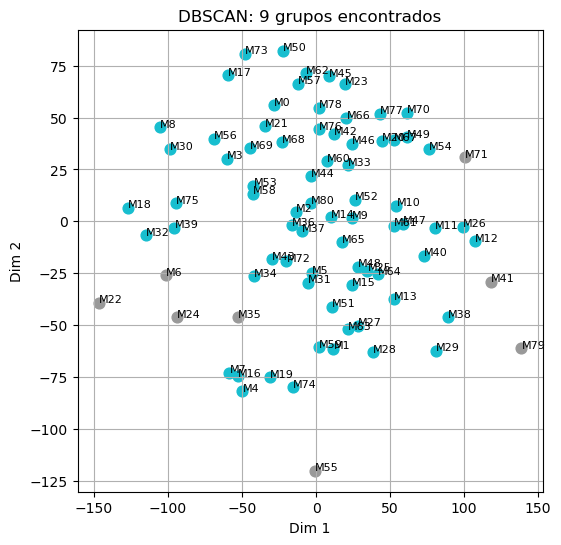

In [59]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=20, min_samples=2)
labels = db.fit_predict(coords)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Colores para los grupos (uno por cluster, gris para ruido)
colors = [plt.cm.tab10(i) if label != -1 else (0.6, 0.6, 0.6) for label in labels]

plt.figure(figsize=(6, 6))
for i in range(len(coords)):
    plt.scatter(coords[i, 0], coords[i, 1], color=colors[i], s=60)
    plt.text(coords[i, 0], coords[i, 1], f"M{i}", fontsize=8)

plt.title(f"DBSCAN: {n_clusters} grupos encontrados")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

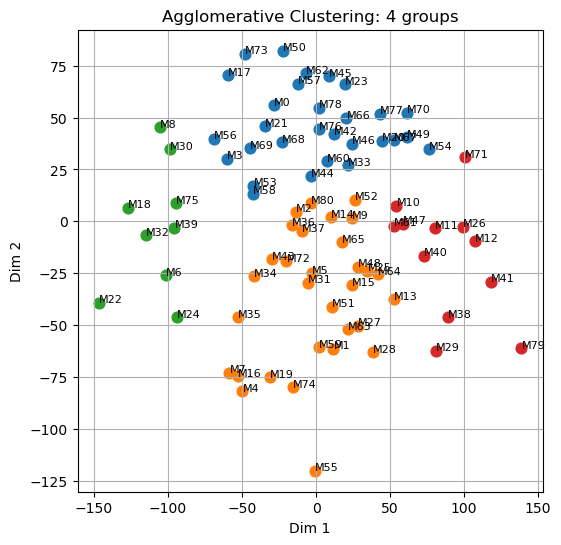

In [103]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4)
labels = ac.fit_predict(coords)

# Colores por grupo
colors = [plt.cm.tab10(label) for label in labels]

plt.figure(figsize=(6, 6))
for i in range(len(coords)):
    plt.scatter(coords[i, 0], coords[i, 1], color=colors[i], s=60)
    plt.text(coords[i, 0], coords[i, 1], f"M{i}", fontsize=8)

plt.title(f"Agglomerative Clustering: {k} groups")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

C:\Users\Eva Martin\AppData\Local\Temp\ipykernel_13100\956201269.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distancias, method='average')


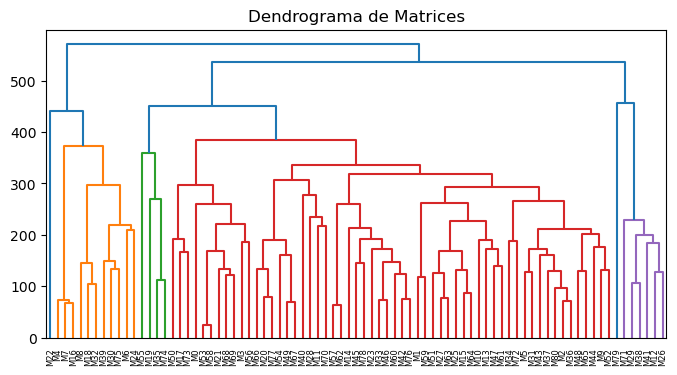

In [64]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Enlace jerárquico con matriz de distancias
Z = linkage(distancias, method='average')

# Dendrograma para ver cómo se agrupan
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=[f"M{i}" for i in range(n)])
plt.title("Dendrograma de Matrices")
plt.show()

# Cortamos el dendrograma en k grupos
# Puedes ajustar `t` para obtener más/menos grupos
clusters = fcluster(Z, t=4, criterion='maxclust')

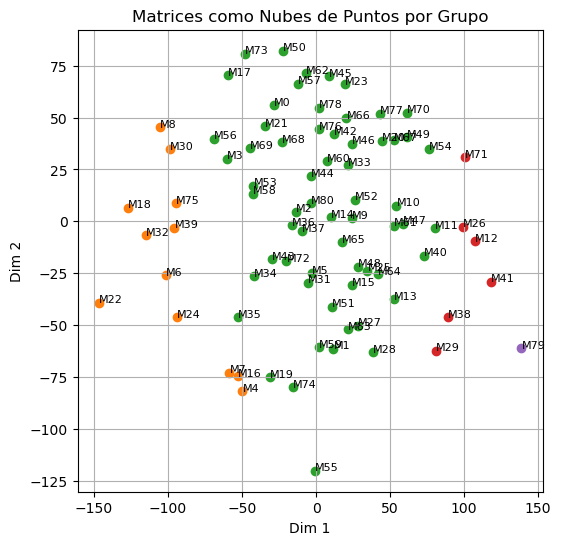

In [65]:
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.scatter(coords[i, 0], coords[i, 1], c=f"C{clusters[i] % 10}", label=f"Grupo {clusters[i]}")
    plt.text(coords[i, 0], coords[i, 1], f"M{i}", fontsize=8)
plt.title("Matrices como Nubes de Puntos por Grupo")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

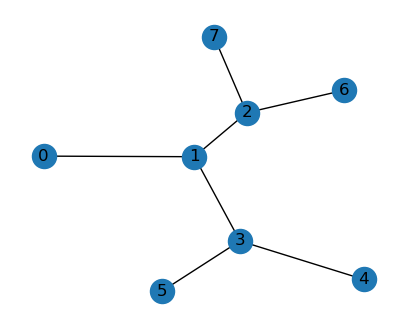

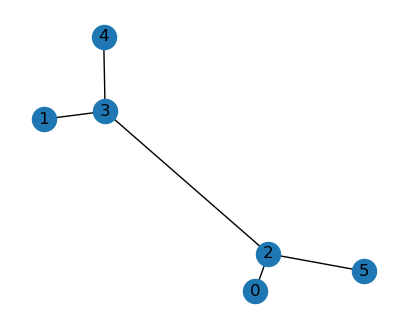

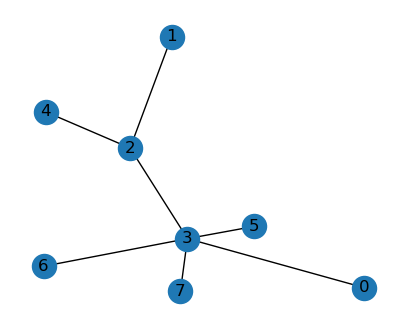

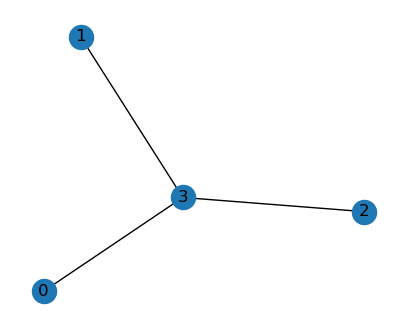

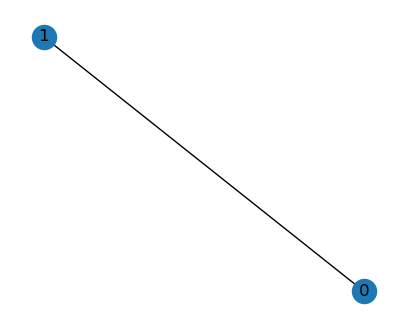

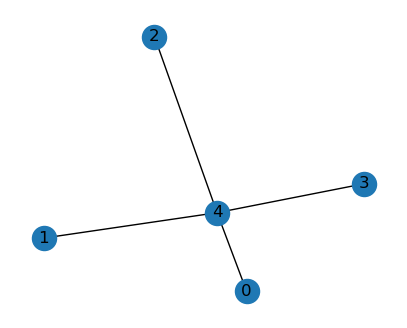

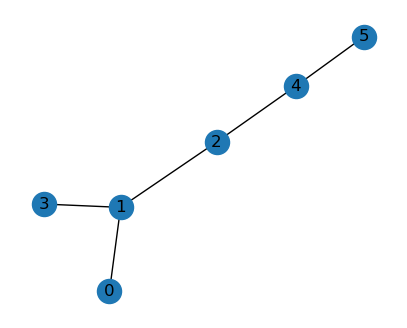

In [11]:

for k,v in classification.items():
    if len(v) >1:
        fig, ax = plt.subplots(figsize=(5,4))
        Gw = nx.from_numpy_array(v[0])
        # Nodos y vonexiones
        nx.draw(Gw, with_labels=True, ax=ax) 


[[ 0.          0.          0.         27.77327995]
 [ 0.          0.          0.         13.88629011]
 [ 0.          0.          0.         42.56046946]
 [27.77327995 13.88629011 42.56046946  0.        ]]
{(0, 3): 27.773279950989174, (1, 3): 13.886290109421507, (2, 3): 42.56046946395811}


{(0, 3): Text(0.4131407673494735, -0.13548398925305516, '27.77'),
 (1, 3): Text(0.15201460146874102, 0.2924604696437176, '13.89'),
 (2, 3): Text(-0.4348446311817855, -0.04552245578974141, '42.56')}

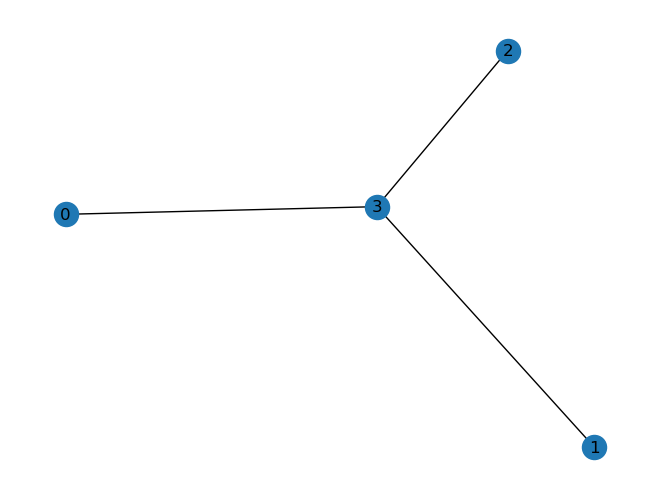

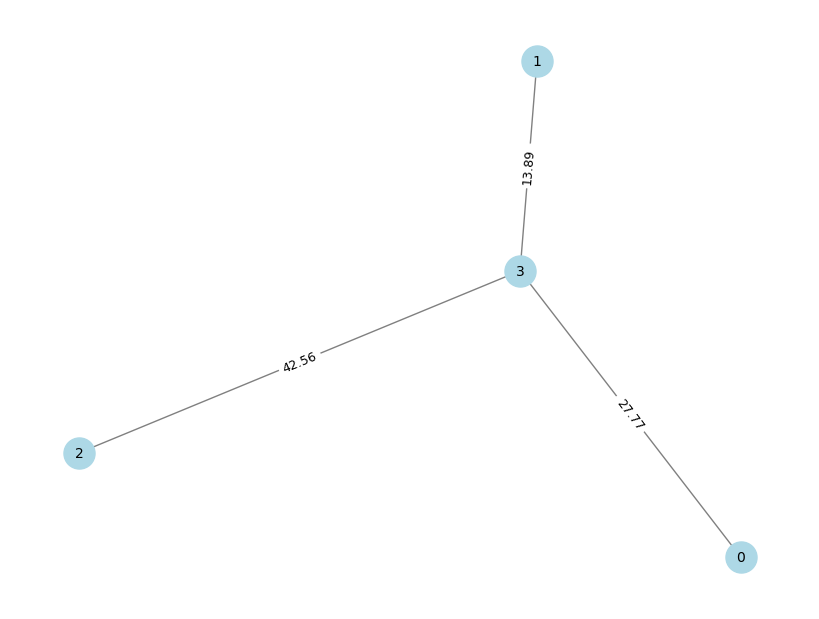

In [23]:

values = classification["Group_7"]
suma = np.sum(values,axis = 0)
mean = suma/len(values)
print(mean)

DG = nx.from_numpy_array(mean, create_using=nx.Graph) #nodelist=[1,2,3,4,5,6] ??


DG.edges(data=True)
nx.draw(DG,with_labels=True) 
edge_weights = nx.get_edge_attributes(DG, 'weight')
print(edge_weights)

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(DG, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {dupl: f"{w:.2f}" for dupl, w in edge_weights.items()}
#edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
nx.draw_networkx_edge_labels(Gw2, pos, edge_labels=edge_labels, font_size=9)